In [1]:
from google.colab import files
data_to_load = files.upload()

Saving TSLA.csv to TSLA.csv


In [2]:
import math

import matplotlib.pyplot as plt

import keras

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [5]:
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [6]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [7]:
training_set

array([[52.444   ],
       [52.450001],
       [52.419998],
       [53.348   ],
       [52.844002],
       [54.5     ],
       [55.      ],
       [54.009998],
       [52.254002],
       [53.93    ],
       [53.476002],
       [52.486   ],
       [51.150002],
       [52.854   ],
       [52.537998],
       [53.52    ],
       [53.257999],
       [52.001999],
       [52.716   ],
       [49.908001],
       [48.716   ],
       [47.630001],
       [47.43    ],
       [47.      ],
       [47.972   ],
       [49.448002],
       [51.112   ],
       [51.076   ],
       [52.066002],
       [50.411999],
       [47.200001],
       [40.557999],
       [46.104   ],
       [45.585999],
       [46.200001],
       [48.372002],
       [49.124001],
       [48.068001],
       [49.060001],
       [50.411999],
       [48.178001],
       [49.009998],
       [50.41    ],
       [49.445999],
       [49.528   ],
       [50.220001],
       [50.549999],
       [50.608002],
       [52.792   ],
       [51.591999],


In [8]:
test_set

array([[ 56.287998],
       [ 57.604   ],
       [ 57.751999],
       [ 58.007999],
       [ 59.338001],
       [ 56.102001],
       [ 60.712002],
       [ 59.540001],
       [ 59.695999],
       [ 60.      ],
       [ 60.382   ],
       [ 62.580002],
       [ 54.051998],
       [ 61.153999],
       [ 62.790001],
       [ 60.666   ],
       [ 58.790001],
       [ 54.93    ],
       [ 52.903999],
       [ 51.049999],
       [ 52.922001],
       [ 51.506001],
       [ 52.200001],
       [ 51.812   ],
       [ 53.139999],
       [ 56.48    ],
       [ 53.858002],
       [ 53.478001],
       [ 52.136002],
       [ 52.773998],
       [ 60.209999],
       [ 63.444   ],
       [ 61.650002],
       [ 67.494003],
       [ 65.678001],
       [ 66.508003],
       [ 67.652   ],
       [ 68.748001],
       [ 68.099998],
       [ 67.814003],
       [ 68.667999],
       [ 69.699997],
       [ 69.800003],
       [ 69.674004],
       [ 66.632004],
       [ 68.540001],
       [ 68.466003],
       [ 69.0

In [9]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [10]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
#LSTM model Define

In [11]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

In [12]:
# Compiling the RNN->LSTM
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

In [13]:

# Fitting the RNN->LSTM to the Training set
model.fit(X_train, y_train,
          epochs = 200,
          batch_size = 32)

Epoch 1/200
24/24 [==============================] - 10s 112ms/step - loss: 0.1572
Epoch 2/200
24/24 [==============================] - 3s 115ms/step - loss: 0.0187
Epoch 3/200
24/24 [==============================] - 3s 117ms/step - loss: 0.0147
Epoch 4/200
24/24 [==============================] - 3s 116ms/step - loss: 0.0126
Epoch 5/200
24/24 [==============================] - 3s 120ms/step - loss: 0.0118
Epoch 6/200
24/24 [==============================] - 3s 117ms/step - loss: 0.0108
Epoch 7/200
24/24 [==============================] - 3s 115ms/step - loss: 0.0120
Epoch 8/200
24/24 [==============================] - 3s 121ms/step - loss: 0.0135
Epoch 9/200
24/24 [==============================] - 3s 116ms/step - loss: 0.0099
Epoch 10/200
24/24 [==============================] - 3s 117ms/step - loss: 0.0121
Epoch 11/200
24/24 [==============================] - 3s 117ms/step - loss: 0.0106
Epoch 12/200
24/24 [==============================] - 3s 120ms/step - loss: 0.0106
Epoch 13/200

In [14]:
#Prepare the Test Data

In [15]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]



In [16]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)



In [17]:
X_test = []
for i in range(60, 519):

    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
#Make Predictions using the test set

In [18]:
predicted_stock_price = model.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

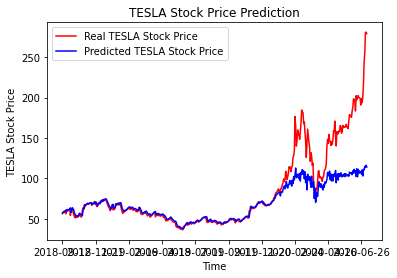

In [25]:
# Visualising the results

plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50))

plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')

plt.legend()

plt.show()

**Observation**: Huge drop in March 2020 due to the COVID-19 lockdown !
We can clearly see that our model performed very good. It is able to accuretly follow most of the unexcepted jumps/drops however, for the most recent date stamps, we can see that the model expected (predicted) lower values compared to the real values of the stock price.